In [1]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as stats

In [2]:
df = pd.read_csv("../data/GSS_414_Raw.csv")
df.head()

,year,id_,satcity,sathobby,satfam,satfrnd,sathealt,socfrend,satjob,satfin,...,pessimst,notcount,moregood,owndoing,depndabl,hlth4,ballot,cesd4,lonely2,lonely3
0,1972,1,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.n: No answer,A little dissatisfied,Not satisfied at all,...,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
1,1972,2,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.n: No answer,.i: Inapplicable,More or less satisfied,...,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
2,1972,3,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.n: No answer,Moderately satisfied,Pretty well satisfied,...,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
3,1972,4,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.n: No answer,Very satisfied,Not satisfied at all,...,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
4,1972,5,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.n: No answer,.i: Inapplicable,Pretty well satisfied,...,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable


In [3]:
df.replace('.i:  Inapplicable', np.nan, inplace=True)
df.replace('.d:  Do not Know/Cannot Choose', np.nan, inplace=True)
df.replace('.n:  No answer', np.nan, inplace=True)
df.replace('.y:  Not available in this year', np.nan, inplace=True)
df.replace('.s:  Skipped on Web', np.nan, inplace=True)

In [4]:
na_counts = df.isna().sum()
na_counts

year            0
id_             0
satcity     48257
sathobby    48356
satfam      48320
satfrnd     48262
sathealt    48269
socfrend    29242
satjob      20503
satfin       4668
lonely      70940
anxious     70950
wktopsat    68910
mntlhlth    59103
satjob1     63131
satself     70015
afailure    70017
slfrspct    70020
ofworth     70015
nogood      70017
optimist    70023
pessimst    70022
notcount    70020
moregood    70019
owndoing    70041
depndabl    70016
hlth4       70045
ballot      21875
cesd4       71426
lonely2     71224
lonely3     71220
dtype: int64

In [5]:
print(df["satcity"].unique())  # See unique values to confirm exact string
print(df["lonely"].unique())

[nan 'GREAT DEAL' 'VERY GREAT DEAL' 'QUITE A BIT' 'NONE' 'SOME'
 'A FAIR AMOUNT' 'A LITTLE']
[nan '0' 'Never' 'Sometimes' 'Often' '7' 'Very often' 'Rarely' '6']


In [6]:
mapping_values = {
    'Very satisfied': 4, 
    'Moderately satisfied': 3,
    'A little dissatisfied': 2,
    'Very dissatisfied': 1,
    'Never': 1,
    'Rarely': 2,
    'Sometimes': 3,
    'Often': 4,
    'Very often': 5,
    'STRONGLY AGREE': 1,
    'AGREE': 2,
    'DISAGREE': 3,
    'STRONGLY DISAGREE': 4,
    'Pretty well satisfied': 1,
    'More or less satisfied': 2,
    'Not satisfied at all': 3,
    'VERY GREAT DEAL': 1,
    'GREAT DEAL': 2,
    'QUITE A BIT': 3,
    'A FAIR AMOUNT': 4,
    'SOME': 5,
    'A LITTLE': 6,
    'NONE': 7,
    'ALMOST DAILY': 7,
    'SEV TIMES A WEEK': 6,
    'SEV TIMES A MNTH': 6,
    'ONCE A MONTH': 4,
    'SEV TIMES A YEAR': 3,
    'ONCE A YEAR': 2,
    'NEVER': 1,
    'Strongly Agree': 1,
    'Agree': 2,
    'Disagree': 3, 
    'Strongly Disagree': 4,
    'Somewhat satisfied': 3,
    'Not too satisfied': 2,
    'Not at all satisfied': 1,
    'I HAVE LITTLE INFLUENCE OVER THINGS THAT HAPPENS TO ME': 1,
    'WHAT HAPPENS TO ME IS LARGELY MY OWN DOING': 2,
    'A very good description': 1,
    'A good description': 2,
    'A fair description': 3,
    'Not a very good description': 4,
    'Not a good description at all': 5,
    'YES': 1,
    'NO': 2,
    'None or almost none of the time': 1,
    'Some of the time': 2,
    'Most of the time': 3,
    'All or almost all of the time': 4
    
}

df.replace(mapping_values, inplace =True)
df.shape

/var/folders/mr/l__s8gys0bsdk26xd9_qkdt80000gn/T/ipykernel_36503/2348713013.py:55: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mapping_values, inplace =True)


(72390, 31)

In [7]:
df['mntlhlth'] = pd.to_numeric(df['mntlhlth'], errors='coerce')

In [8]:
threshold = 18  # At least 3 non-NaN values required to keep the row
df_cleaned = df.dropna(thresh=threshold)

df_cleaned.isna().sum()

year          0
id_           0
satcity     802
sathobby    802
satfam      802
satfrnd     802
sathealt    802
socfrend    228
satjob        0
satfin        0
lonely      802
anxious     802
wktopsat    802
mntlhlth     79
satjob1     802
satself       0
afailure      0
slfrspct      1
ofworth       0
nogood        0
optimist      0
pessimst      1
notcount      0
moregood      1
owndoing      4
depndabl      0
hlth4         1
ballot        0
cesd4       802
lonely2     802
lonely3     802
dtype: int64

In [9]:
df_cleaned.drop(['satcity', 'sathobby', 'satfam', 'satfrnd', 'sathealt', 'anxious', 'lonely', 'wktopsat', 'satjob1', 'cesd4', 'lonely2', 'lonely3'], axis=1, inplace=True)



/var/folders/mr/l__s8gys0bsdk26xd9_qkdt80000gn/T/ipykernel_36503/3999641416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['satcity', 'sathobby', 'satfam', 'satfrnd', 'sathealt', 'anxious', 'lonely', 'wktopsat', 'satjob1', 'cesd4', 'lonely2', 'lonely3'], axis=1, inplace=True)


In [10]:
df_cleaned.isna().sum()
df_cleaned.shape

(802, 19)

In [11]:
###USE LATER TO FILL NA
df_cleaned.fillna({
    "socfrend": df["socfrend"].median(),
    "mntlhlth": df["mntlhlth"].median(),
    "pessimst": df["pessimst"].median(),
    "moregood": df["moregood"].median(),
    "slfrspct": df["slfrspct"].median(),
    'hlth4': df["hlth4"].median(),
    "owndoing": "Unknown"
}, inplace=True)


df_cleaned.isna().sum()

/var/folders/mr/l__s8gys0bsdk26xd9_qkdt80000gn/T/ipykernel_36503/664939218.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned.fillna({
/var/folders/mr/l__s8gys0bsdk26xd9_qkdt80000gn/T/ipykernel_36503/664939218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.fillna({
/var/folders/mr/l__s8gys0bsdk26xd9_qkdt80000gn/T/ipykernel_36503/664939218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

year        0
id_         0
socfrend    0
satjob      0
satfin      0
mntlhlth    0
satself     0
afailure    0
slfrspct    0
ofworth     0
nogood      0
optimist    0
pessimst    0
notcount    0
moregood    0
owndoing    0
depndabl    0
hlth4       0
ballot      0
dtype: int64

In [12]:
df_cleaned.describe()

,year,id_,socfrend,satjob,satfin,mntlhlth,satself,afailure,slfrspct,ofworth,nogood,optimist,pessimst,notcount,moregood,depndabl,hlth4
count,802.0,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.00000,802.000000,802.000000,802.000000,802.000000
mean,2004.0,1344.658354,4.406484,3.321696,1.962594,4.195761,1.733167,3.401496,2.951372,1.475062,3.245636,1.885287,2.94389,2.910224,1.786783,1.619701,1.981297
std,0.0,765.239031,1.388146,0.815734,0.750262,6.780698,0.628989,0.707299,0.883405,0.626108,0.801535,0.723639,0.74659,0.797574,0.670904,0.723261,0.135559
min,2004.0,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,2004.0,682.250000,4.000000,3.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,3.00000,2.000000,1.000000,1.000000,2.000000
50%,2004.0,1331.500000,4.000000,3.500000,2.000000,1.000000,2.000000,4.000000,3.000000,1.000000,3.000000,2.000000,3.00000,3.000000,2.000000,1.500000,2.000000
75%,2004.0,1986.000000,6.000000,4.000000,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,2.000000,3.00000,3.000000,2.000000,2.000000,2.000000
max,2004.0,2808.000000,7.000000,4.000000,3.000000,30.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,5.000000,2.000000


In [13]:
df_cleaned[['socfrend', 'satself', 'mntlhlth']].describe()

,socfrend,satself,mntlhlth
count,802.000000,802.000000,802.000000
mean,4.406484,1.733167,4.195761
std,1.388146,0.628989,6.780698
min,1.000000,1.000000,0.000000
25%,4.000000,1.000000,0.000000
50%,4.000000,2.000000,1.000000
75%,6.000000,2.000000,5.000000
max,7.000000,4.000000,30.000000


In [14]:
df_cleaned['socfrend'].value_counts()

df_cleaned['socfrend'].value_counts(normalize = True)*100

df_cleaned['satself'].value_counts(normalize = True)*100

df_cleaned['mntlhlth'].value_counts(normalize=True)*100

mntlhlth
0.0     43.765586
2.0      9.102244
1.0      8.229426
5.0      7.481297
3.0      7.481297
10.0     5.486284
20.0     3.865337
15.0     3.117207
4.0      2.992519
7.0      2.369077
30.0     1.995012
25.0     0.997506
8.0      0.748130
14.0     0.748130
6.0      0.498753
12.0     0.249377
23.0     0.249377
11.0     0.124688
17.0     0.124688
18.0     0.124688
28.0     0.124688
29.0     0.124688
Name: proportion, dtype: float64

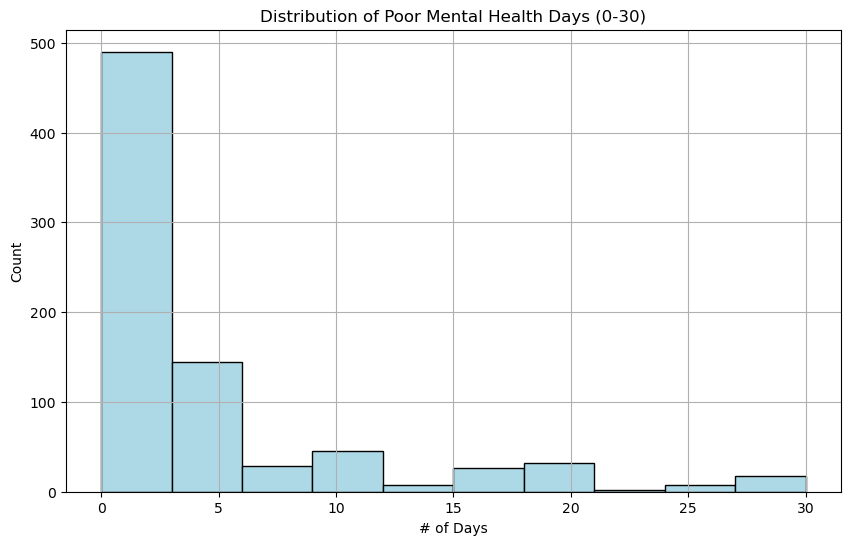

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['mntlhlth'], bins=10, color='lightblue', edgecolor='black')
plt.title('Distribution of Poor Mental Health Days (0-30)')
plt.xlabel('# of Days')
plt.ylabel('Count')
plt.grid(True)
plt.show()

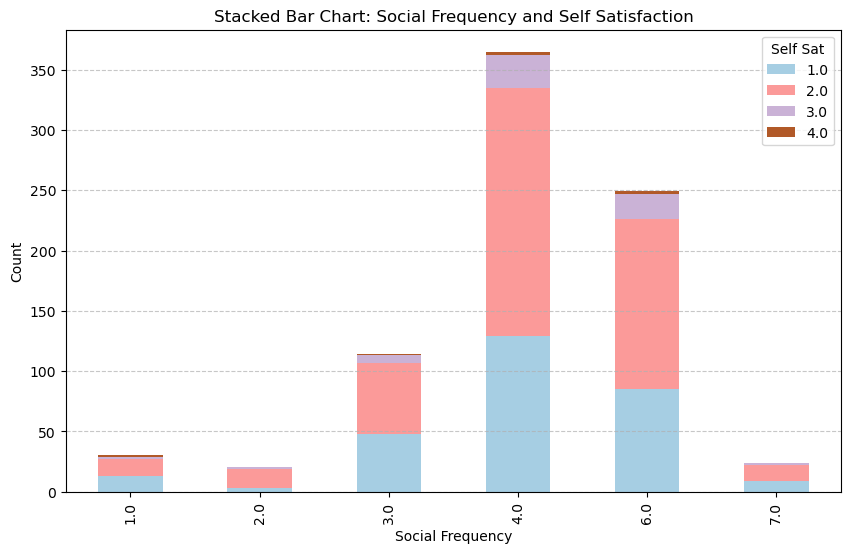

In [16]:
# Create a cross-tabulation of Gender and MentalHealthCategory
cross_tab = pd.crosstab(df_cleaned['socfrend'], df_cleaned['satself'])

# Plot a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')

# Add labels and title
plt.title('Stacked Bar Chart: Social Frequency and Self Satisfaction')
plt.xlabel('Social Frequency')
plt.ylabel('Count')
plt.legend(title='Self Sat')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


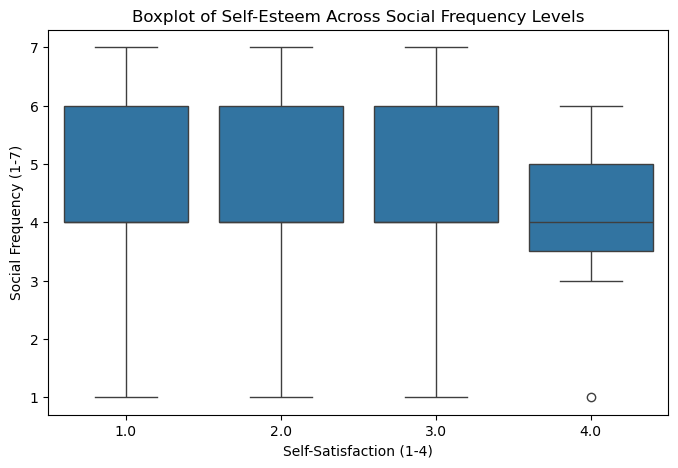

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_cleaned["socfrend"], x=df_cleaned["satself"])
plt.xlabel("Self-Satisfaction (1-4)")
plt.ylabel("Social Frequency (1-7)")
plt.title("Boxplot of Self-Esteem Across Social Frequency Levels")
plt.show()

In [18]:
rho, p_value = stats.spearmanr(df_cleaned["mntlhlth"], df_cleaned["satself"])

print(f"Spearman Correlation: {rho}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant relationship: # of poor mental health days with lower self-esteem.")
else:
    print("No significant relationship found.")

Spearman Correlation: 0.25641558779403817
P-value: 1.6571850030743958e-13
Significant relationship: # of poor mental health days with lower self-esteem.


/var/folders/mr/l__s8gys0bsdk26xd9_qkdt80000gn/T/ipykernel_36503/3196767869.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=df_cleaned["mntlhlth"], y=df_cleaned["satself"], ci="sd")


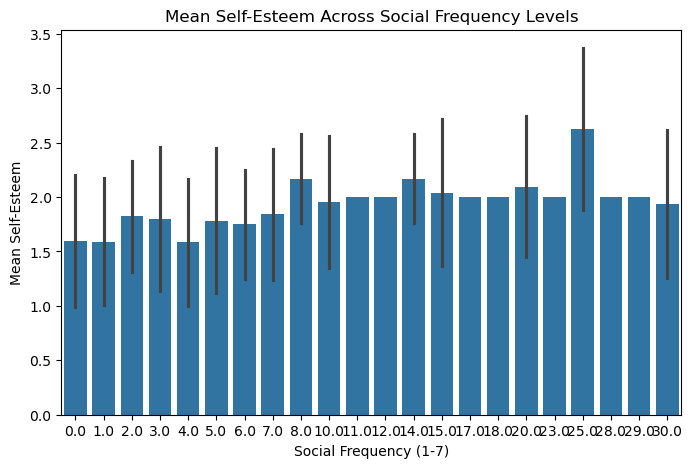

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df_cleaned["mntlhlth"], y=df_cleaned["satself"], ci="sd")
plt.xlabel("Social Frequency (1-7)")
plt.ylabel("Mean Self-Esteem")
plt.title("Mean Self-Esteem Across Social Frequency Levels")
plt.show()

/var/folders/mr/l__s8gys0bsdk26xd9_qkdt80000gn/T/ipykernel_36503/659491836.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(y=df_cleaned["mntlhlth"], x=df_cleaned["satself"], ci="sd")


Text(0.5, 1.0, 'Mean Self-Esteem Across Poor Mental Health Days')

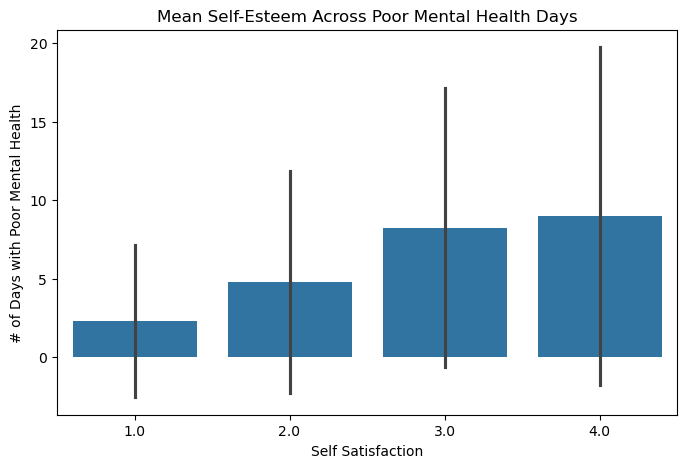

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(y=df_cleaned["mntlhlth"], x=df_cleaned["satself"], ci="sd")
plt.xlabel("Self Satisfaction")
plt.ylabel("# of Days with Poor Mental Health")
plt.title("Mean Self-Esteem Across Poor Mental Health Days")

In [21]:
rho, p_value = stats.spearmanr(df_cleaned["mntlhlth"], df_cleaned["socfrend"])

print(f"Spearman Correlation: {rho}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant relationship: # of poor mental health days less social frequency.")
else:
    print("No significant relationship found.")

    

Spearman Correlation: 0.06725585706105085
P-value: 0.05693043322178813
No significant relationship found.


In [22]:
for self_esteem_level in sorted(df_cleaned["satself"].unique()):
    group = df_cleaned[df_cleaned["satself"] == self_esteem_level]
    
    rho, p_value = stats.spearmanr(group["mntlhlth"], group["socfrend"])
    print(f"Self-Esteem Level {self_esteem_level}: Spearman Correlation = {rho:.4f}, P-value = {p_value:.4f}")


Self-Esteem Level 1.0: Spearman Correlation = 0.0479, P-value = 0.4191
Self-Esteem Level 2.0: Spearman Correlation = 0.1145, P-value = 0.0152
Self-Esteem Level 3.0: Spearman Correlation = -0.3423, P-value = 0.0080
Self-Esteem Level 4.0: Spearman Correlation = 0.2330, P-value = 0.6151


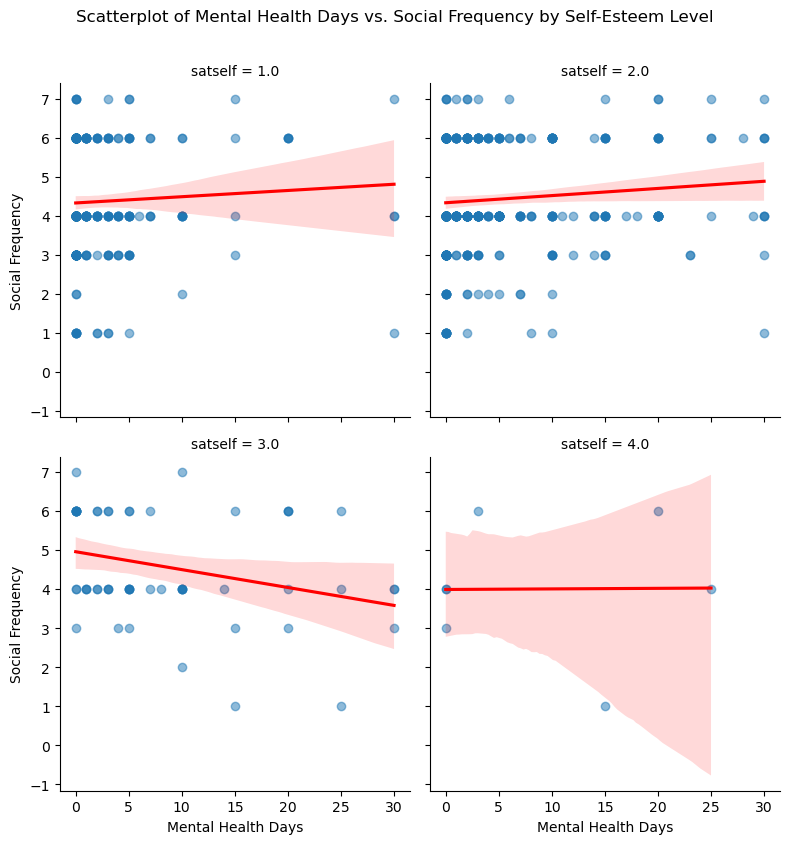

In [23]:
g = sns.FacetGrid(df_cleaned, col="satself", col_wrap=2, height=4)
g.map_dataframe(sns.regplot, x="mntlhlth", y="socfrend", scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
g.set_axis_labels("Mental Health Days", "Social Frequency")
g.fig.suptitle("Scatterplot of Mental Health Days vs. Social Frequency by Self-Esteem Level", y=1.05)
plt.show()